In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/Library_Usage.csv")
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
0,1,Juvenile,0,0,0 to 9 years,r3,Richmond,NaN,NaN,z,Email,True,2022,True
1,2,Teen,0,0,10 to 19 years,x,Main,NaN,NaN,z,Email,True,2022,True
2,0,Adult,0,0,35 to 44 years,m4,Merced,NaN,NaN,z,Email,True,2019,True
3,2,Teen,0,0,10 to 19 years,x,Main,NaN,NaN,z,Email,True,2021,True
4,2,Teen,0,0,10 to 19 years,b2,Bayview,NaN,NaN,z,Email,True,2013,True


In [3]:
df.dtypes

Patron Type Code                  int64
Patron Type Definition           object
Total Checkouts                   int64
Total Renewals                    int64
Age Range                        object
Home Library Code                object
Home Library Definition          object
Circulation Active Month         object
Circulation Active Year         float64
Notice Preference Code           object
Notice Preference Definition     object
Provided Email Address             bool
Year Patron Registered            int64
Within San Francisco County        bool
dtype: object

In [4]:
df['Within San Francisco County'].mode()

0    True
Name: Within San Francisco County, dtype: bool

+ Berechne 2-3 Statistiken und erstelle 2-3 Visualisierungen basierend auf den Informationen im Datensatz.
+ Nutze pandas zur Berechnung der Statistiken und seaborn für die Visualisierungen.

Beispielfragen, die Du mit dem Datensatz beantworten und visualisieren kannst:

1. Wie viele Senioren und Kinder sind Kunden der San Francisco Public Library?
2. Wie viele Nutzer möchten per Mail informiert werden?
3. Wie alt sind diese Nutzer durchschnittlich im Vergleich zu Nutzern, die per Post informiert werden möchten?
4. Wie viele Ausleihen werden im Mittel pro Altersgruppe und pro Jahr getätigt? Ist die Streuung zwischen den Gruppen gleich?

Meine Fragen:
1. Räumliche Verteilung der Home-Library-Definition (oder Code) auf einer Landkarte des SF-County, 
    inkl. Within SF County: (true/false)
2. Verteilung Notice (Email/Phone/Print/None) zu Year Patron Registered und Altersgruppe.
3. Zusammenhang Altersgruppe, Ausleihzahlen und Herkunft.
4. Wohnort Kinder und Senioren.
5. Menge der Ausleihen an Lehrer, Staff (statistische Verteilungen) gegenüber Adults.
6. Bevölkerungsstatistiken SF (extern) korrelieren.
7. Provided Email zu Notice (wer hat zwar, will aber nicht) inkl. Altersgruppe?

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
import pandas as pd

df = pd.read_csv(
    "../data/Library_Usage.csv", 
    na_values="none"
)
pd.crosstab(
    df['Provided Email Address'],
    df['Notice Preference Definition'],
    margins=True
)

Notice Preference Definition,Email,None,Phone,Print,All
Provided Email Address,,,,,
False,476,2668,35235,7173,45552
True,391138,32,324,69,391563
All,391614,2700,35559,7242,437115


In [7]:
pd.crosstab(
    df['Provided Email Address'],
    df['Notice Preference Definition'],
    margins=True, normalize=1
)


Notice Preference Definition,Email,None,Phone,Print,All
Provided Email Address,,,,,
False,0.001215,0.988148,0.990888,0.990472,0.104211
True,0.998785,0.011852,0.009112,0.009528,0.895789


In [8]:
import pandas as pd

df = pd.read_csv("../data/Library_Usage.csv")
df['Total Checkouts'].corr(df['Total Renewals'])


0.6321191391451014

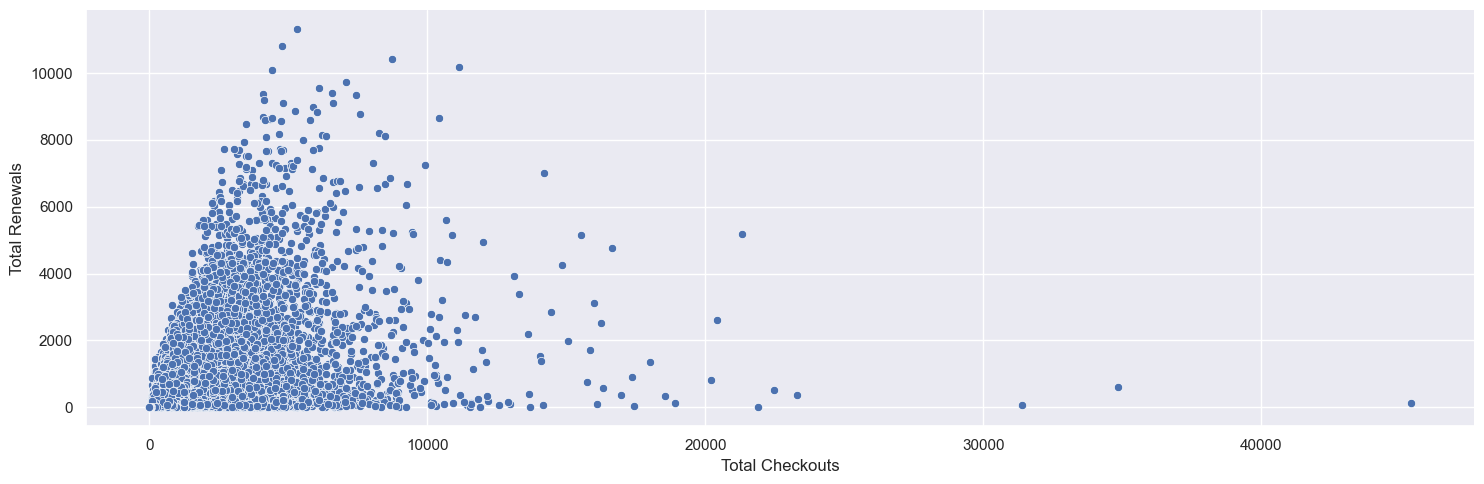

In [9]:
sns.relplot(x='Total Checkouts', y='Total Renewals', data=df,
            height=5, aspect=3)
plt.savefig('../tutorial.png', dpi=150)


In [10]:
sns.relplot(x='Total Checkouts', y='Total Renewals', 
                hue='Provided Email Address', style='Within San Francisco County', 
                size='Year Patron Registered', data=df)


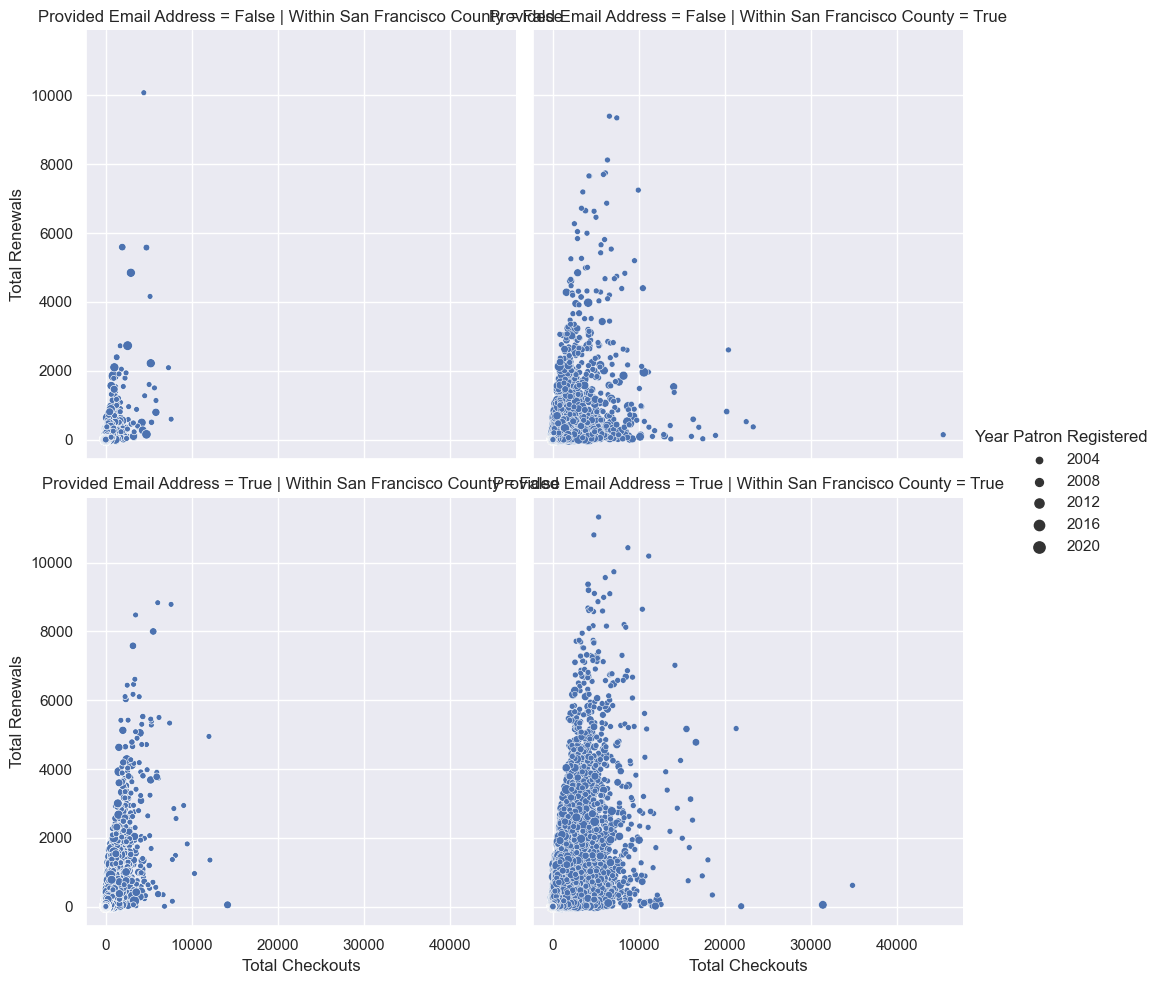

In [83]:
sns.relplot(x='Total Checkouts', y='Total Renewals', 
            size='Year Patron Registered',
            row='Provided Email Address', col='Within San Francisco County', data=df)


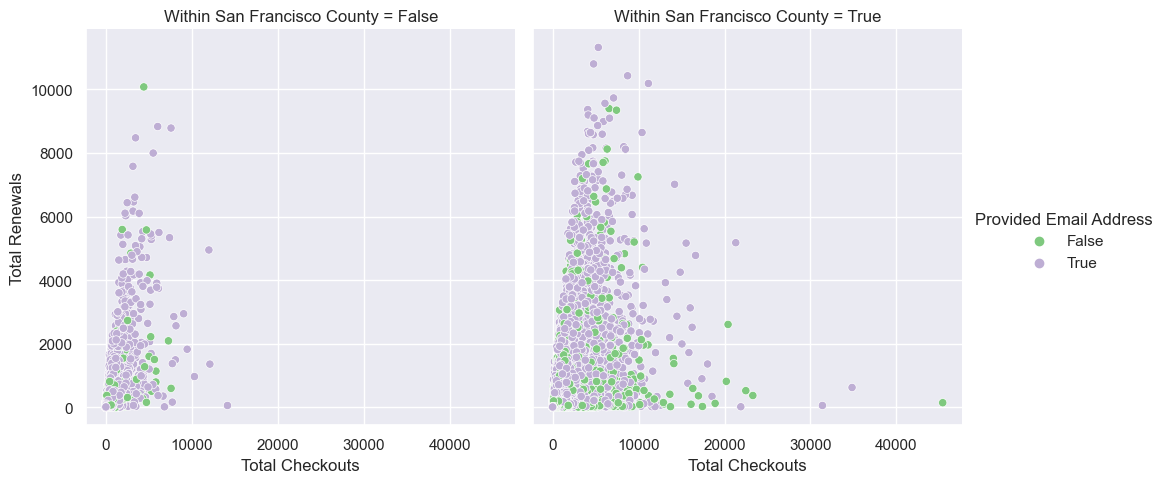

In [85]:
sns.relplot(x='Total Checkouts', y='Total Renewals', 
            hue='Provided Email Address', 
            col='Within San Francisco County',
            palette=sns.color_palette('Accent', 2), 
            data=df)


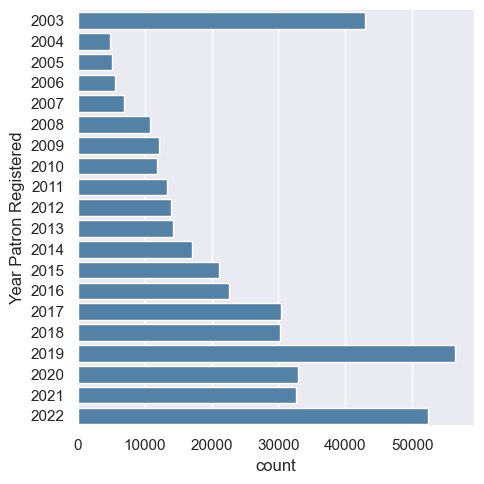

In [86]:
sns.catplot(y='Year Patron Registered',
            data=df, kind='count', color="steelblue")

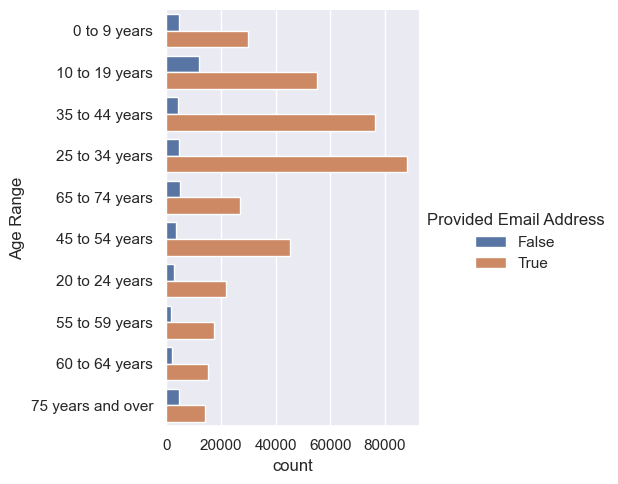

In [87]:
sns.catplot(y='Age Range', hue='Provided Email Address', 
            data=df, kind='count')

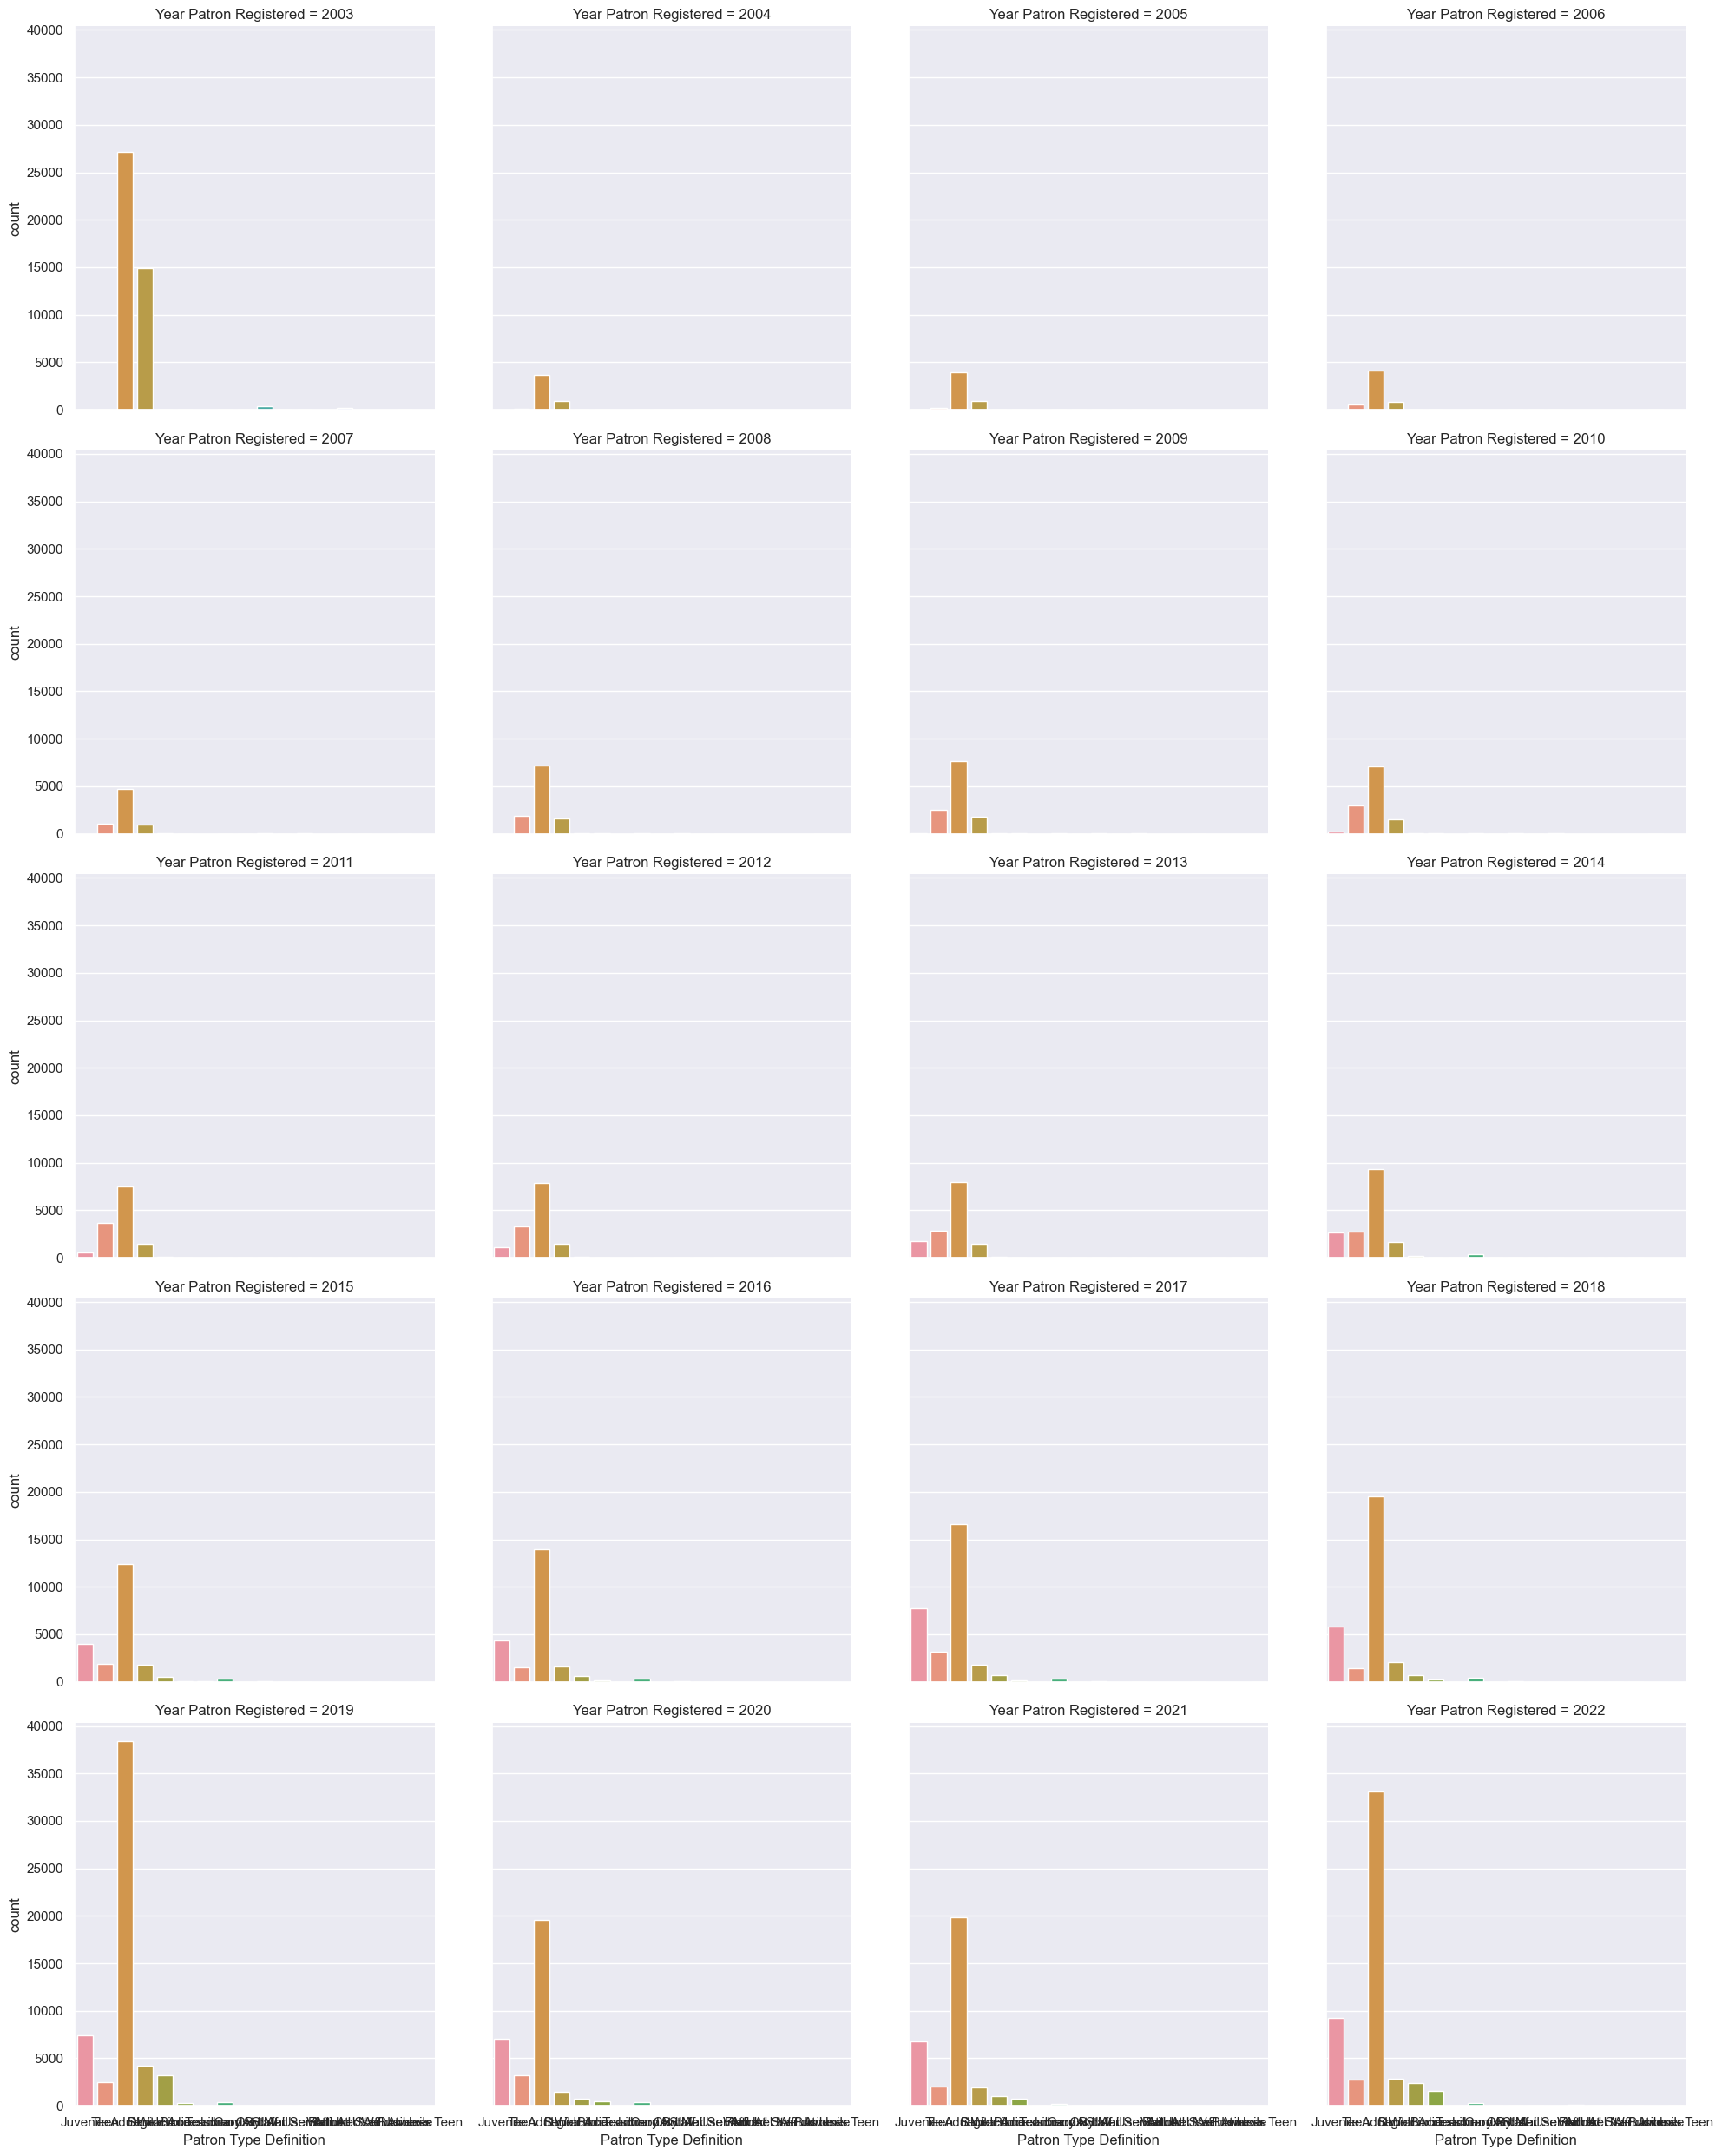

In [88]:
sns.catplot(x='Patron Type Definition', 
            data=df, kind='count', 
            col='Year Patron Registered', col_wrap=4)

<AxesSubplot:xlabel='Total Renewals'>

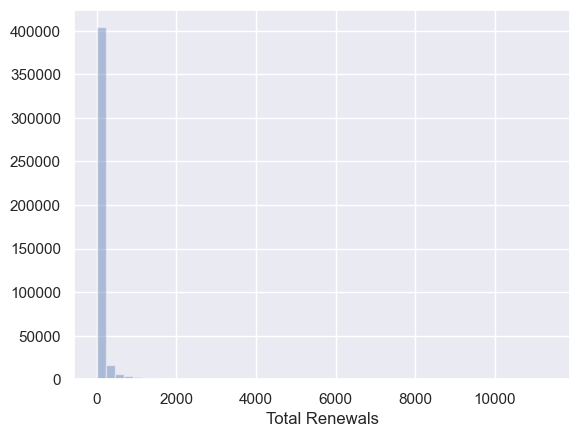

In [92]:
# Histogram

sns.distplot(df['Total Renewals'], kde=False)

/Users/frank/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Renewals', ylabel='Density'>

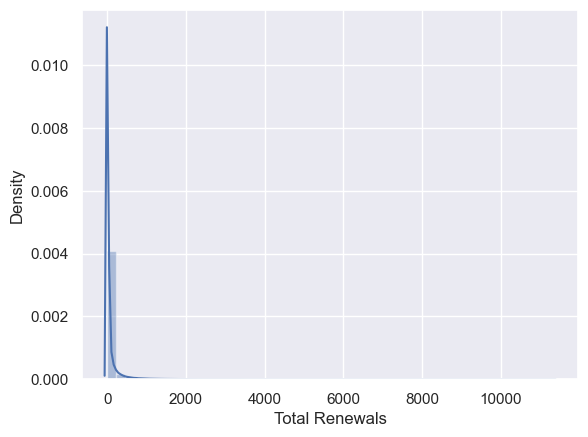

In [90]:
# With density estimation

sns.distplot(df['Total Renewals'], kde=True)